In [12]:
%matplotlib inline
import numpy as np
from nn_classes import *
import os
#import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sn
from msw_model_2019_annotated import *
from DA_2019 import *
from datetime import datetime

## Data generation for training

In [35]:
nens = 100
n_train = 10000
n_val = 100
cycles = 50
samples = 100
exp_ID_start = 20 

In [36]:
DataGenerator_uniform(nens=nens,cycles=cycles,n_train=n_train,n_val=n_val,mode='val')

1.0


## ML training

In [44]:
t0_rf = datetime.now()
train_rf(nens=nens,n_estimator=50,max_depth=None,min_samples_split=5,ccp_alpha=0.0,val_obs=False,random_seed=nens*exp_ID_start)
dt_rf = datetime.now()-t0_rf
print('random forest:', dt_rf)
'''t0_bnn = datetime.now()
train_bnn(nens=nens,epochs=100,val_obs=False,neurons=20)
dt_bnn = datetime.now()-t0_bnn
print('bnn:', dt_bnn)'''

oob score 0.7809155237527593
test score 0.7168537033738968
random forest: 0:02:55.915613


"t0_bnn = datetime.now()\ntrain_bnn(nens=nens,epochs=100,val_obs=False,neurons=20)\ndt_bnn = datetime.now()-t0_bnn\nprint('bnn:', dt_bnn)"

## Save input, output, ground truth for validation/test set for plotting

In [45]:
t0_rf = datetime.now()
save_parameter_preds_rf(nens=nens,n_train=n_train,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_start+1,val_obs=False)
dt_rf = datetime.now()-t0_rf
print('random forest:', dt_rf)
t0_bnn = datetime.now()
save_parameter_preds_bnn(nens=nens,n_train=n_train,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_start+1,samples=100,val_obs=False)
dt_bnn = datetime.now()-t0_bnn
print('bnn:', dt_bnn)

random forest: 0:00:00.795734
bnn: 0:00:01.160676


# Data assimilation cycles with constant true/false/bnn parameters

In [3]:
DA_cycles_total = 100
exp_ID_start = 70
exp_ID_end = 90
nens = 400
n_train = 10000

#DA(mode='bnn',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=100,n_train=n_train)
#DA(mode='rf',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=100,n_train=n_train)
DA(mode='true',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=50,n_train=n_train)
DA(mode='false',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=50,n_train=n_train)

created folder :  data/online/metrics/true/400/71
created folder :  data/online/metrics/true/400/72
created folder :  data/online/metrics/true/400/73
created folder :  data/online/metrics/true/400/74
created folder :  data/online/metrics/true/400/75
created folder :  data/online/metrics/true/400/76
created folder :  data/online/metrics/true/400/77
created folder :  data/online/metrics/true/400/78
created folder :  data/online/metrics/true/400/79
created folder :  data/online/metrics/true/400/80
created folder :  data/online/metrics/true/400/81
created folder :  data/online/metrics/true/400/82
created folder :  data/online/metrics/true/400/83
created folder :  data/online/metrics/true/400/84
created folder :  data/online/metrics/true/400/85
created folder :  data/online/metrics/true/400/86
created folder :  data/online/metrics/true/400/87
created folder :  data/online/metrics/true/400/88
created folder :  data/online/metrics/true/400/89
created folder :  data/online/metrics/false/400/70

In [ ]:
n_train = 10000
n_val = 100
cycles = 50
for nens in [25,50,100,200,400]:
    DataGenerator_uniform(nens=nens,cycles=cycles,n_train=n_train,n_val=n_val,mode='val')
    train_rf(nens=nens,n_estimator=100,max_depth=None,min_samples_split=5,ccp_alpha=0.0,val_obs=False,random_seed=nens*nens)
    train_bnn(nens=nens,epochs=100,val_obs=False,neurons=20)

    DA_cycles_total = 100
    exp_ID_start = 70
    exp_ID_end = 90

    DA(mode='bnn',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=100,n_train=n_train)
    DA(mode='rf',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=100,n_train=n_train)
    DA(mode='true',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=50,n_train=n_train)
    DA(mode='false',DA_cycles_total=DA_cycles_total,exp_ID_start=exp_ID_start,exp_ID_end=exp_ID_end,nens=nens,samples=50,n_train=n_train)

1.0
oob score 0.8308207945416836
test score 0.5227150723494118
epoch:  0  train Loss:  14918727.73161206   val Loss [0.80800319 0.70767969 0.85079891]  val spread [1.00206484 0.87288047 0.98262958]
epoch:  10  train Loss:  124561.01838736984   val Loss [0.29494173 0.28607964 0.30659573]  val spread [0.07296581 0.06610092 0.08440034]
epoch:  20  train Loss:  102620.09924503982   val Loss [0.29213831 0.2557665  0.26378572]  val spread [0.04237636 0.04422234 0.06162702]
epoch:  30  train Loss:  80337.39556170958   val Loss [0.28935789 0.20089226 0.21675355]  val spread [0.03799716 0.06414273 0.06683387]
epoch:  40  train Loss:  54884.79571487486   val Loss [0.28782936 0.14362603 0.15855114]  val spread [0.02769272 0.07643983 0.07398148]
epoch:  50  train Loss:  48425.53593381782   val Loss [0.28746649 0.13035235 0.15108216]  val spread [0.02233525 0.08016773 0.06547925]
epoch:  60  train Loss:  41709.80005333192   val Loss [0.26354284 0.1378478  0.16223612]  val spread [0.07242376 0.09619

# Plots

In [8]:
nens = 200
n_train = 10000
n_val = 100
exp_ID = 5

## Training

## Inference

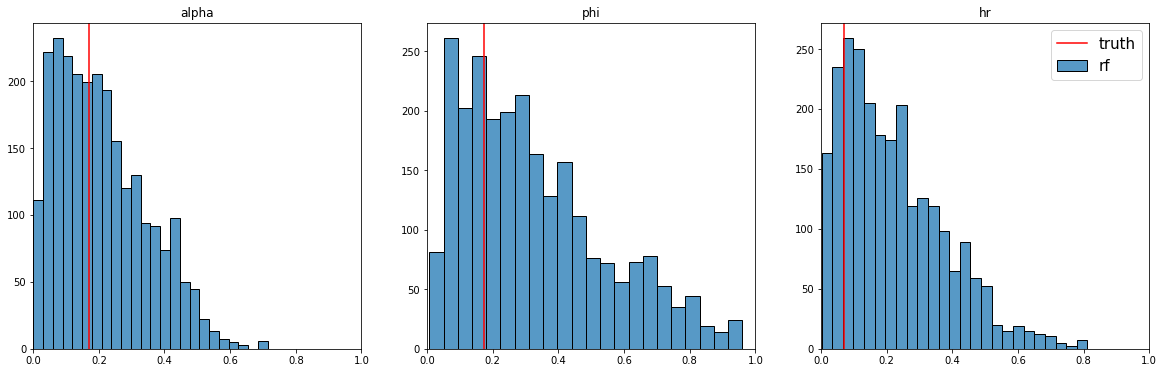

In [9]:
# histogramm of parameter predictions
%matplotlib inline
plot_parameters_hist('rf',exp_ID,nens,n_train,100,val_obs=False)

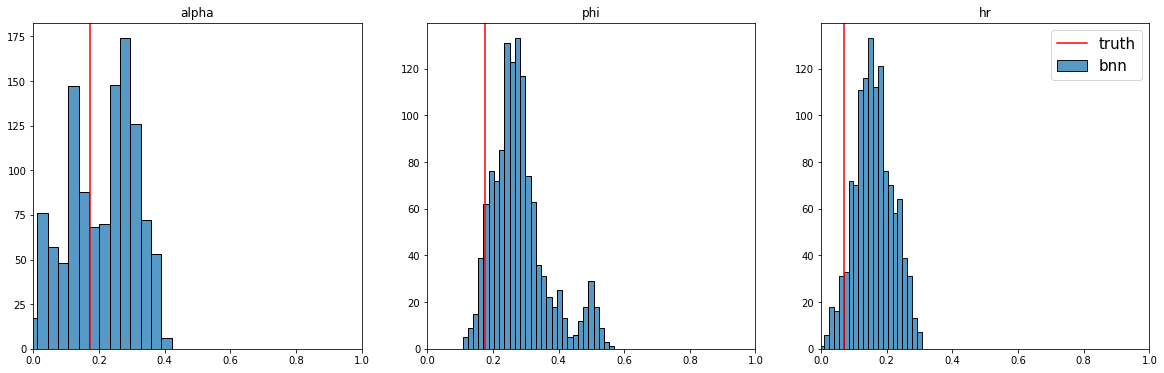

In [10]:
# histogramm of parameter predictions
%matplotlib inline
plot_parameters_hist('bnn',exp_ID,nens,n_train,100,val_obs=False)

(array([0.18740603, 0.1078263 , 0.13292421]),
 array([0.11495385, 0.09037151, 0.07359763]))

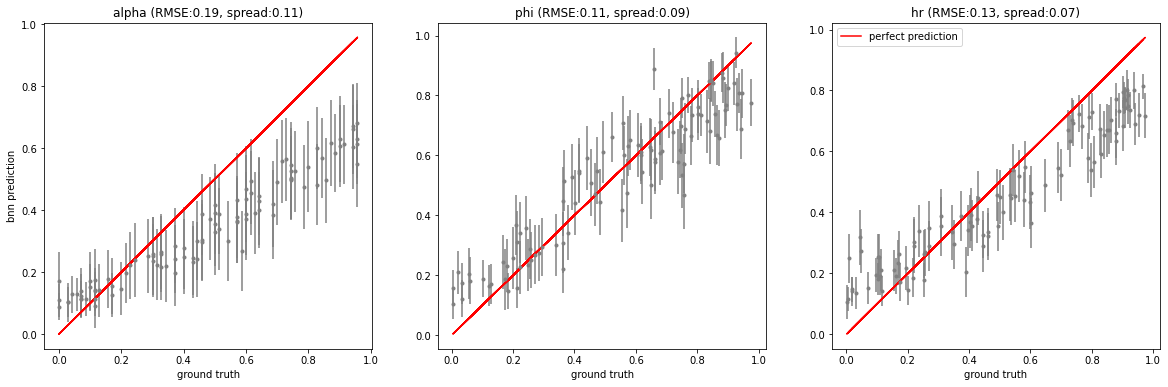

In [11]:
%matplotlib inline
plot_parameters('bnn',nens,n_train,n_val,samples=50,val_obs=False)

(array([0.18615177, 0.17112737, 0.19807615]),
 array([0.18135027, 0.22032143, 0.19288008]))

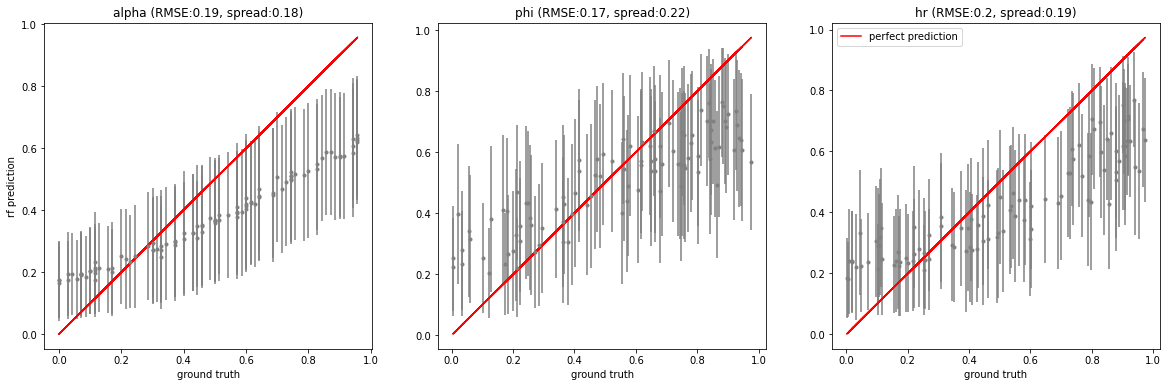

In [12]:
%matplotlib inline
plot_parameters('rf',nens,n_train,n_val,samples=100,val_obs=False)

## Data assimilation with bnn/true/false parameters

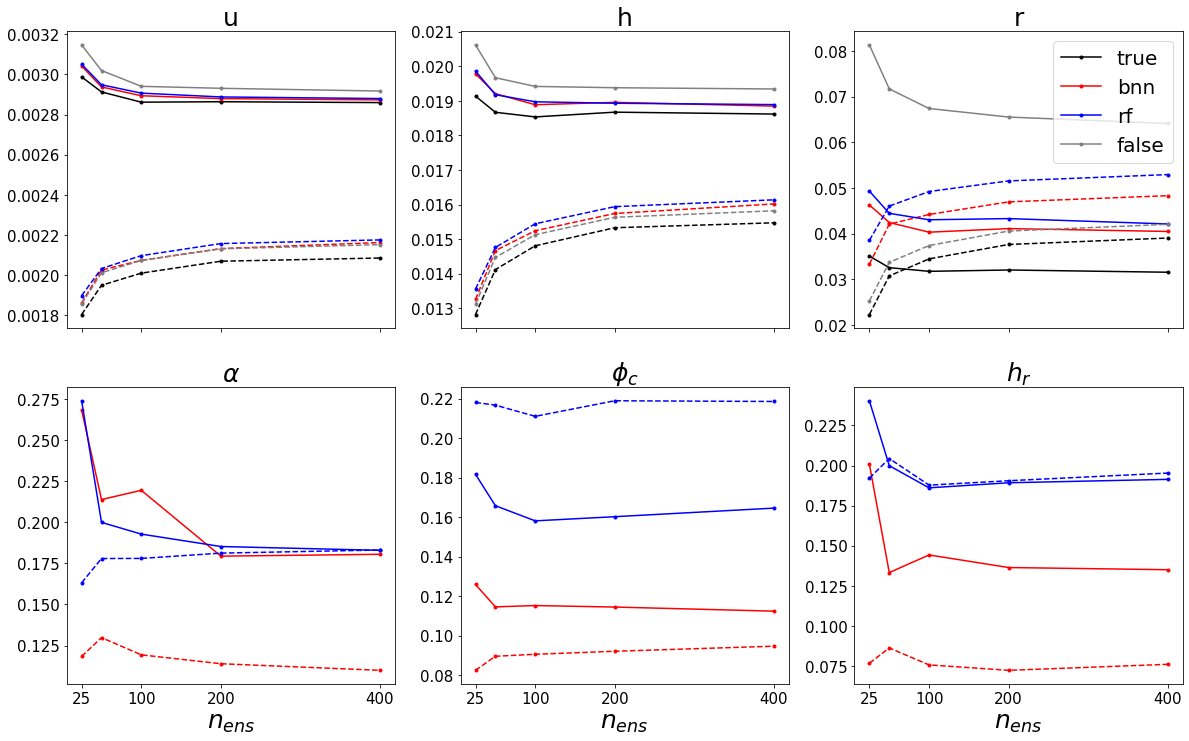

In [33]:
# RMSE and spreads of atmospheric variables (u/h/r) and model parameters (alpha/phic/hr) against DA ensemble size
%matplotlib inline
DA_cycles = 50
nens = [25,50,100,200,400]
x_ticks = [25,100,200,400]
x_ticks_str = [str(i) for i in x_ticks]
ID_start = 0
ID_end = 90
IDs = ID_end-ID_start
samples = 100
n_train = 10000

modes = ['true','bnn','rf','false']
n = 0
rmse_spread_vars = np.zeros((IDs,len(modes),len(nens),DA_cycles,6))
#rmse_spread_params = np.zeros((IDs,len(modes),len(nens),DA_cycles,6))

for j,mode in enumerate(modes):
    for k,ens in enumerate(nens):
        print(nens)
        for exp_ID in range(IDs):
            for i in range(DA_cycles):
                data = np.loadtxt('data/online/metrics/'+mode+'/'+str(ens)+'/'+str(exp_ID+ID_start)+'/'+str(i+50)+'.csv',delimiter=',')
                rmse_spread_vars[exp_ID,j,k,i,:] = data[1,:]
                #rmse_spread_params[exp_ID,j,k,i,:] = data[0,:]

rmse_rf,spread_rf,rmse_bnn,spread_bnn = np.zeros((len(nens),3)),np.zeros((len(nens),3)),np.zeros((len(nens),3)),np.zeros((len(nens),3))

for k in range(len(nens)):
    params_truth = np.zeros((3,IDs))
    params_ml = np.zeros((2,3,IDs,nens[k],samples))
    for i in range(ID_start,ID_end):
        params_truth[:,i] = np.loadtxt('data/parameters_bnn/'+str(nens[k])+'_nens/'+str(n_train)+'_ntrain/'+str(i)+'/truth_output.csv',delimiter=',',skiprows=1)
        for j in range(nens[k]):
                params_ml[0,:,i,j,...] = np.loadtxt('data/parameters_bnn/'+str(nens[k])+'_nens/'+str(n_train)+'_ntrain/'+str(i)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T
                params_ml[1,:,i,j,...] = np.loadtxt('data/parameters_rf/'+str(nens[k])+'_nens/'+str(n_train)+'_ntrain/'+str(i)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T

    params_ml_mean_bnn = np.mean(params_ml[0,...].reshape((3,IDs,-1)),axis=2)
    params_ml_std_bnn = np.std(params_ml[0,...].reshape((3,IDs,-1)),axis=2)

    params_ml_mean_rf = np.mean(params_ml[1,...].reshape((3,IDs,-1)),axis=2)
    params_ml_std_rf = np.std(params_ml[1,...].reshape((3,IDs,-1)),axis=2)

    rmse_bnn[k,:] = np.mean((params_ml_mean_bnn-params_truth)**2,axis=1)**(1/2)
    spread_bnn[k,:] = np.mean(params_ml_std_bnn,axis=1)

    rmse_rf[k,:] = np.mean((params_ml_mean_rf-params_truth)**2,axis=1)**(1/2)
    spread_rf[k,:] = np.mean(params_ml_std_rf,axis=1)
            
rmse_spread_vars = np.mean(np.mean(rmse_spread_vars,axis=0)[:,:,:,:],axis=2)
#rmse_params = (np.mean(np.mean(rmse_spread_params[:,:,DA_cycles-1:,:3],axis=2),axis=0))**(1/2)
#spread_params = np.mean(np.mean(rmse_spread_params,axis=0)[:,:,DA_cycles-1:,3:],axis=2)

ylabels_vars = ['u','h','r']
params_names = [r'$\alpha$',r'$\phi_c$',r'$h_r$']
labels = ['true','bnn','rf','false']
colors = ['black','red','blue','gray']

fig, ax = plt.subplots(2,3,figsize = (20,12),sharex=True)

for i in range(3):
    for j in range(len(modes)):
        if i in [0,1]:
            ax[0,i].plot(nens,rmse_spread_vars[j,:,i],'.-',color=colors[j],label=labels[j])
            ax[0,i].plot(nens,rmse_spread_vars[j,:,i+3],'.--',color=colors[j])
        else:
            ax[0,i].plot(nens,rmse_spread_vars[j,:,i]*1e3,'.-',color=colors[j],label=labels[j])
            ax[0,i].plot(nens,rmse_spread_vars[j,:,i+3]*1e3,'.--',color=colors[j])
        '''if j in [1,2]:
            ax[1,i].plot(nens,rmse_params[j,i],'.-',color=colors[j],label=labels[j])
            ax[1,i].plot(nens,spread_params[j,i],'.--',color=colors[j])'''
    ax[1,i].plot(nens,rmse_bnn[:,i],'.-',color=colors[1],label=labels[1])
    ax[1,i].plot(nens,spread_bnn[:,i],'.--',color=colors[1])
    ax[1,i].plot(nens,rmse_rf[:,i],'.-',color=colors[2],label=labels[2])
    ax[1,i].plot(nens,spread_rf[:,i],'.--',color=colors[2])
    ax[0,i].set_title(ylabels_vars[i],fontsize=25)
    ax[1,i].set_title(params_names[i],fontsize=25)
    ax[1,i].set_xlabel(r'$n_{ens}$',fontsize=25)
    ax[0,i].tick_params(axis='y', which='major', labelsize=15)
    ax[1,i].tick_params(axis='y', which='major', labelsize=15)
    ax[1,i].set_xticks(x_ticks)
    ax[1,i].set_xticklabels(x_ticks_str,fontsize=15)
ax[0,2].legend(fontsize=20)

plt.savefig('plots/nens.pdf')

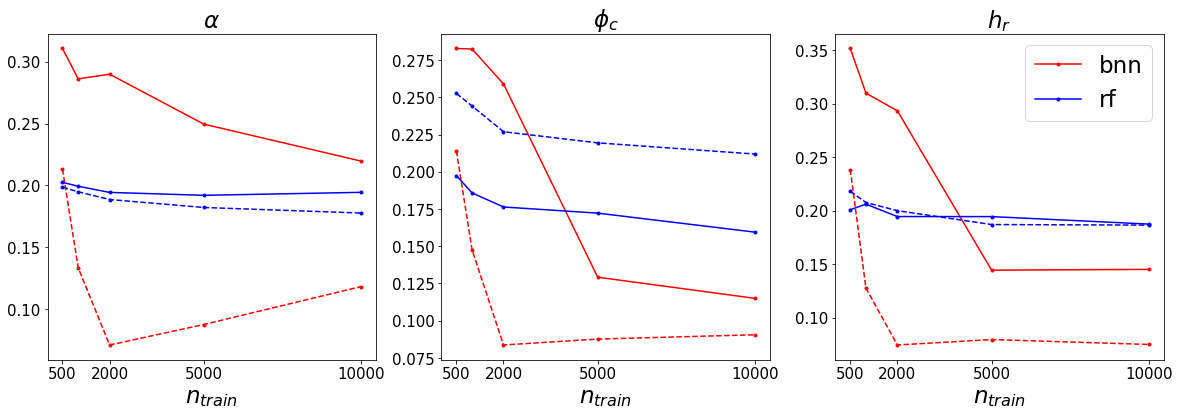

In [34]:
%matplotlib inline
nens = 100
ID_start = 0
ID_end = 100
IDs = ID_end-ID_start
samples = 100
n_train = [500,1000,2000,5000,10000]
x_ticks = [500,2000,5000,10000]
x_ticks_str = [str(i) for i in x_ticks]
modes = ['bnn','rf']

rmse_rf,spread_rf,rmse_bnn,spread_bnn = np.zeros((len(n_train),3)),np.zeros((len(n_train),3)),np.zeros((len(n_train),3)),np.zeros((len(n_train),3))

for k in range(len(n_train)):
    params_truth = np.zeros((3,IDs))
    params_ml = np.zeros((2,3,IDs,nens,samples))
    for i in range(ID_start,ID_end):
        params_truth[:,i] = np.loadtxt('data/parameters_bnn/'+str(nens)+'_nens/'+str(n_train[k])+'_ntrain/'+str(i)+'/truth_output.csv',delimiter=',',skiprows=1)
        for j in range(nens):
                params_ml[0,:,i,j,...] = np.loadtxt('data/parameters_bnn/'+str(nens)+'_nens/'+str(n_train[k])+'_ntrain/'+str(i)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T
                params_ml[1,:,i,j,...] = np.loadtxt('data/parameters_rf/'+str(nens)+'_nens/'+str(n_train[k])+'_ntrain/'+str(i)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T

    params_ml_mean_bnn = np.mean(params_ml[0,...].reshape((3,IDs,-1)),axis=2)
    params_ml_std_bnn = np.std(params_ml[0,...].reshape((3,IDs,-1)),axis=2)

    params_ml_mean_rf = np.mean(params_ml[1,...].reshape((3,IDs,-1)),axis=2)
    params_ml_std_rf = np.std(params_ml[1,...].reshape((3,IDs,-1)),axis=2)

    rmse_bnn[k,:] = np.mean((params_ml_mean_bnn-params_truth)**2,axis=1)**(1/2)
    spread_bnn[k,:] = np.mean(params_ml_std_bnn,axis=1)

    rmse_rf[k,:] = np.mean((params_ml_mean_rf-params_truth)**2,axis=1)**(1/2)
    spread_rf[k,:] = np.mean(params_ml_std_rf,axis=1)

params_names = [r'$\alpha$',r'$\phi_c$',r'$h_r$']
labels = ['bnn','rf']
colors = ['red','blue']

fig, ax = plt.subplots(1,3,figsize = (20,6),sharex=True)

for i in range(3):
    ax[i].plot(n_train,rmse_bnn[:,i],'.-',color=colors[0],label=labels[0])
    ax[i].plot(n_train,spread_bnn[:,i],'.--',color=colors[0])
    ax[i].plot(n_train,rmse_rf[:,i],'.-',color=colors[1],label=labels[1])
    ax[i].plot(n_train,spread_rf[:,i],'.--',color=colors[1])
    ax[i].set_title(params_names[i],fontsize=23)
    ax[i].set_xlabel(r'$n_{train}$',fontsize=23)
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_ticks_str,fontsize=15)
    ax[i].tick_params(axis='y', which='major', labelsize=15)
ax[2].legend(fontsize=23)
plt.savefig('plots/ntrain.pdf')

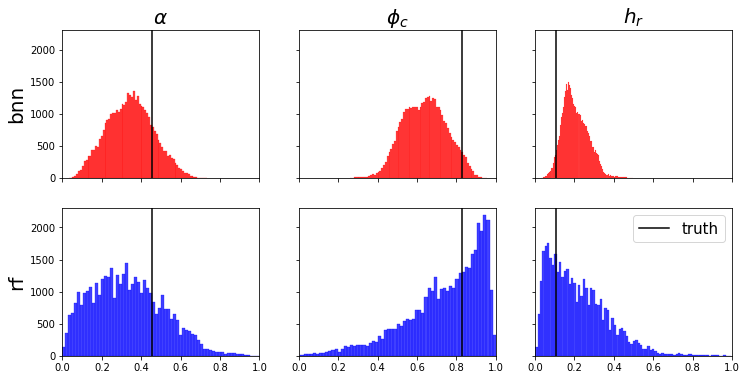

In [10]:
%matplotlib inline

fig, ax = plt.subplots(2,3,figsize = (12,6),sharex=True,sharey=True)
nens = 400
samples = 100
n_train = 10000
exp_ID = 8

params_ml = np.zeros((2,3,nens,samples))
for j in range(nens):
    params_ml[0,:,j,:] = np.loadtxt('data/parameters_bnn/'+str(nens)+'_nens/'+str(n_train)+'_ntrain/'+str(exp_ID)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T
    params_ml[1,:,j,:] = np.loadtxt('data/parameters_rf/'+str(nens)+'_nens/'+str(n_train)+'_ntrain/'+str(exp_ID)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T

params_truth = np.loadtxt('data/parameters_bnn/'+str(nens)+'_nens/'+str(n_train)+'_ntrain/'+str(exp_ID)+'/truth_output.csv',delimiter=',',skiprows=1)

params_bnn = params_ml[0,...].reshape((3,-1))
params_rf = params_ml[1,...].reshape((3,-1))

params_names = [r'$\alpha$',r'$\phi_c$',r'$h_r$']
ylabels = ['bnn','rf']

for i in range(3):
    sn.histplot(params_bnn[i,:],ax=ax[0,i],color='red',edgecolor='red')
    sn.histplot(params_rf[i,:],ax=ax[1,i],color='blue',edgecolor='blue')
    ax[0,i].axvline(params_truth[i],color='black',label='truth')
    ax[0,i].set_xlim(0, 1)
    ax[1,i].axvline(params_truth[i],color='black',label='truth')
    ax[1,i].set_xlim(0, 1)
    ax[0,i].set_title(params_names[i],fontsize=20)
ax[0,0].set_ylabel(ylabels[0],fontsize=20)
ax[1,0].set_ylabel(ylabels[1],fontsize=20)
plt.legend(fontsize=15)

plt.savefig('plots/hist.pdf')

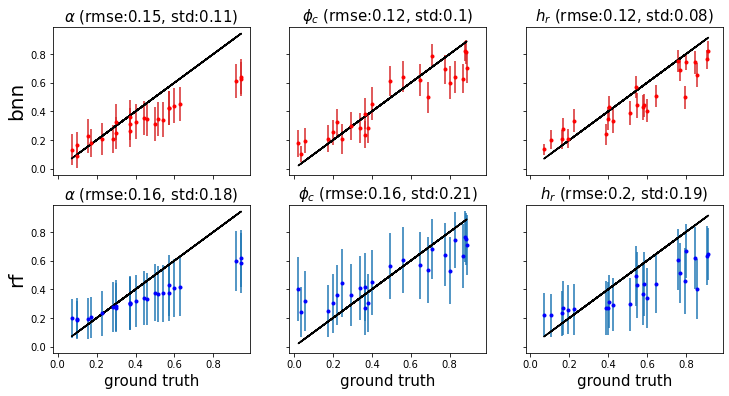

In [15]:
%matplotlib inline

nens = 400
samples = 100
n_train = 10000
n_val = 25

params_truth = np.zeros((3,n_val))
params_ml = np.zeros((2,3,n_val,nens,samples))

for i in range(n_val):
    params_truth[:,i] = np.loadtxt('data/parameters_bnn/'+str(nens)+'_nens/'+str(n_train)+'_ntrain/'+str(i)+'/truth_output.csv',delimiter=',',skiprows=1)
    for j in range(nens):
            params_ml[0,:,i,j,...] = np.loadtxt('data/parameters_bnn/'+str(nens)+'_nens/'+str(n_train)+'_ntrain/'+str(i)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T
            params_ml[1,:,i,j,...] = np.loadtxt('data/parameters_rf/'+str(nens)+'_nens/'+str(n_train)+'_ntrain/'+str(i)+'/'+str(j)+'_output.csv',delimiter=',',skiprows=1).T

params_ml_mean_bnn = np.mean(params_ml[0,...].reshape((3,n_val,-1)),axis=2)
params_ml_std_bnn = np.std(params_ml[0,...].reshape((3,n_val,-1)),axis=2)

params_ml_mean_rf = np.mean(params_ml[1,...].reshape((3,n_val,-1)),axis=2)
params_ml_std_rf = np.std(params_ml[1,...].reshape((3,n_val,-1)),axis=2)

fig, ax = plt.subplots(2,3,figsize = (12,6),sharex=True,sharey=True)

params_names = [r'$\alpha$',r'$\phi_c$',r'$h_r$']
ylabels = ['bnn','rf']

rmse_bnn = np.mean((params_ml_mean_bnn-params_truth)**2,axis=1)**(1/2)
spread_bnn = np.mean(params_ml_std_bnn,axis=1)

rmse_rf = np.mean((params_ml_mean_rf-params_truth)**2,axis=1)**(1/2)
spread_rf = np.mean(params_ml_std_rf,axis=1)

for i in range(3):
    ax[0,i].errorbar(x=params_truth[i,:],y=params_ml_mean_bnn[i,:],yerr=params_ml_std_bnn[i,:],fmt='.',color='red',ecolor='tab:red')
    ax[0,i].plot(params_truth[i,:],params_truth[i,:],color='black',label='perfect prediction')
    ax[0,i].set_title(params_names[i]+' (rmse:'+str(round(rmse_bnn[i],2))+', std:'+str(round(spread_bnn[i],2))+')',fontsize=15)
    ax[0,0].set_ylabel(ylabels[0],fontsize=20)
    
    ax[1,i].errorbar(x=params_truth[i,:],y=params_ml_mean_rf[i,:],yerr=params_ml_std_rf[i,:],fmt='.',color='blue',ecolor='tab:blue')
    ax[1,i].plot(params_truth[i,:],params_truth[i,:],color='black',label='perfect prediction')
    ax[1,i].set_title(params_names[i]+' (rmse:'+str(round(rmse_rf[i],2))+', std:'+str(round(spread_rf[i],2))+')',fontsize=15)
    ax[1,0].set_ylabel(ylabels[1],fontsize=20)
    
    ax[1,i].set_xlabel('ground truth',fontsize=15)
    
#plt.savefig('plots/scatter.pdf')